<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/K-Nearest-Neighbor/machine_learning_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 농어의 길이만 있어도 무게를 잘 예측할 수 있다고 판단
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [4]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눔
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿈
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [7]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3) # 최근접 이웃 개수는 3
# k-최근접 이웃 회귀 모델을 훈련
knr.fit(train_input, train_target)
print(knr.predict([[50]])) # 길이가 50cm인 농어 무게 예측

[1033.33333333]


1033kg 예측 = 실제론 1.5kg

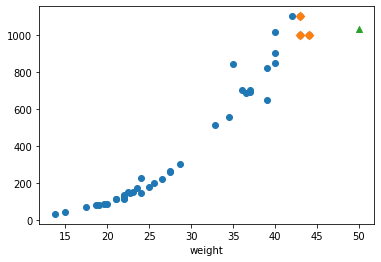

In [10]:
import matplotlib.pyplot as plt
# 50cm 농어의 이웃을 구한다
distances, indexes = knr.kneighbors([[50]])
# 훈련 세트이 산점도를 그린다
plt.scatter(train_input, train_target)
#훈련 세트 중에서 이웃 샘플만 다시 그린다
plt.scatter(train_input[indexes], train_target[indexes], marker='D')
# 50cm의 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.xlabel('weight')
plt.show()